In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data = pd.read_csv('Classified Data', index_col=0)

In [8]:
data.tail()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1
999,0.837460,0.961184,0.417006,0.799784,0.934399,0.424762,0.778234,0.907962,1.257190,1.364837,1


In [9]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X = scaler.fit_transform(data.drop('TARGET CLASS', axis = 1))

In [15]:
y = data['TARGET CLASS']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier(n_neighbors=10)

In [54]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [55]:
prediction = knn.predict(X_test)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        98
           1       0.97      0.95      0.96       102

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

[[95  3]
 [ 5 97]]


In [51]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_test)
    rate = np.mean(prediction != y_test)
    error_rate.append(rate)
    

In [27]:
error_rate

[0.055,
 0.065,
 0.055,
 0.05,
 0.05,
 0.055,
 0.055,
 0.055,
 0.045,
 0.04,
 0.045,
 0.04,
 0.04,
 0.04,
 0.05,
 0.04,
 0.045,
 0.045,
 0.045,
 0.04,
 0.045,
 0.045,
 0.045,
 0.05,
 0.045,
 0.05,
 0.05,
 0.05,
 0.055,
 0.05,
 0.05,
 0.05,
 0.055,
 0.06,
 0.055,
 0.055,
 0.055,
 0.055,
 0.055]

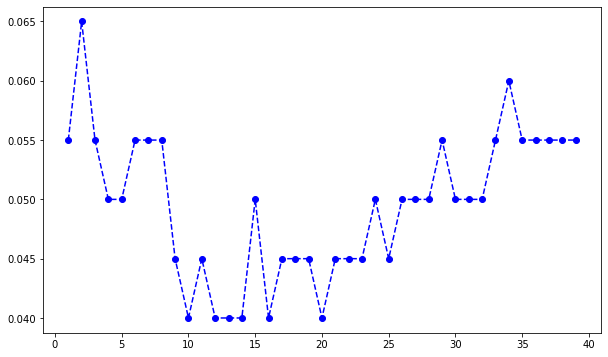

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed', marker ='o')

In [43]:
#using the elbow method, selecting 10 as our n-neighbour for better model performance